**1. Importing all the libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sn 
import urllib
import urllib.request
import time
from datetime import datetime
import re

**2. Scraping the data**

In [2]:
t_end = time.time() + 60 * 1
x_y1={}
x_y2={}
while time.time() < t_end:
  Time=datetime.now()
  t=Time.strftime("%H:%M:%S")
  with urllib.request.urlopen("https://api.thingspeak.com/channels/1346212/feeds.json?api_key=X9U2XG5ORTWDGKFG&results=2") as url:
    s1 = url.read()
    select=repr(s1)
    #Fetching Temperature Data from the API 
    select=select[250:] 
    print(select)   
    pick1=re.search('field1":"(.+?)",',select)
    if pick1:
      x_y1[t]=pick1.group(1)
    #Fetching Humidity Data from the API
    select=select[50:100]
    pick2=re.search('field2":"(.+?)"}',select)
    if pick2:
      x_y2[t]=pick2.group(1)
      #y2.append(pick2.group(1))
      #print(pick2.group(1))

#Temperature
x_1=np.array(list(x_y1.keys()))  
y_1=np.array(list(x_y1.values()))  

x1=[]
for i in x_1:
  x1.append(i[0]+i[1]+'.'+i[3]+i[4]+i[6]+i[7])
x_1=[float(i) for i in x1] ##Time
x1=x_1

y1=[float(i) for i in y_1] ##Temperature

#Humidity
x_2=np.array(list(x_y2.keys()))  
y_2=np.array(list(x_y2.values()))  

x2=[]
for j in x_2:
  x2.append(j[0]+j[1]+'.'+j[3]+j[4]+j[6]+j[7])
x_2=[float(j) for j in x2] ##Time
x2=x_2

y2=[float(j) for j in y_2] ##Temperature
print(x1,y1)
print(x2,y2)

d_at":"2021-04-16T14:24:30Z","entry_id":607,"field1":null,"field2":"67.00000"},{"created_at":"2021-04-16T14:24:45Z","entry_id":608,"field1":"32.00000","field2":null}]}'
d_at":"2021-04-16T14:24:30Z","entry_id":607,"field1":null,"field2":"67.00000"},{"created_at":"2021-04-16T14:24:45Z","entry_id":608,"field1":"32.00000","field2":null}]}'
d_at":"2021-04-16T14:24:30Z","entry_id":607,"field1":null,"field2":"67.00000"},{"created_at":"2021-04-16T14:24:45Z","entry_id":608,"field1":"32.00000","field2":null}]}'
d_at":"2021-04-16T14:24:30Z","entry_id":607,"field1":null,"field2":"67.00000"},{"created_at":"2021-04-16T14:24:45Z","entry_id":608,"field1":"32.00000","field2":null}]}'
d_at":"2021-04-16T14:24:30Z","entry_id":607,"field1":null,"field2":"67.00000"},{"created_at":"2021-04-16T14:24:45Z","entry_id":608,"field1":"32.00000","field2":null}]}'
d_at":"2021-04-16T14:24:30Z","entry_id":607,"field1":null,"field2":"67.00000"},{"created_at":"2021-04-16T14:24:45Z","entry_id":608,"field1":"32.00000","fie

In [3]:
len(list(x_y2.keys()))


19

In [4]:
len(y2)

19

**3.Plotting Temperature vs Time**


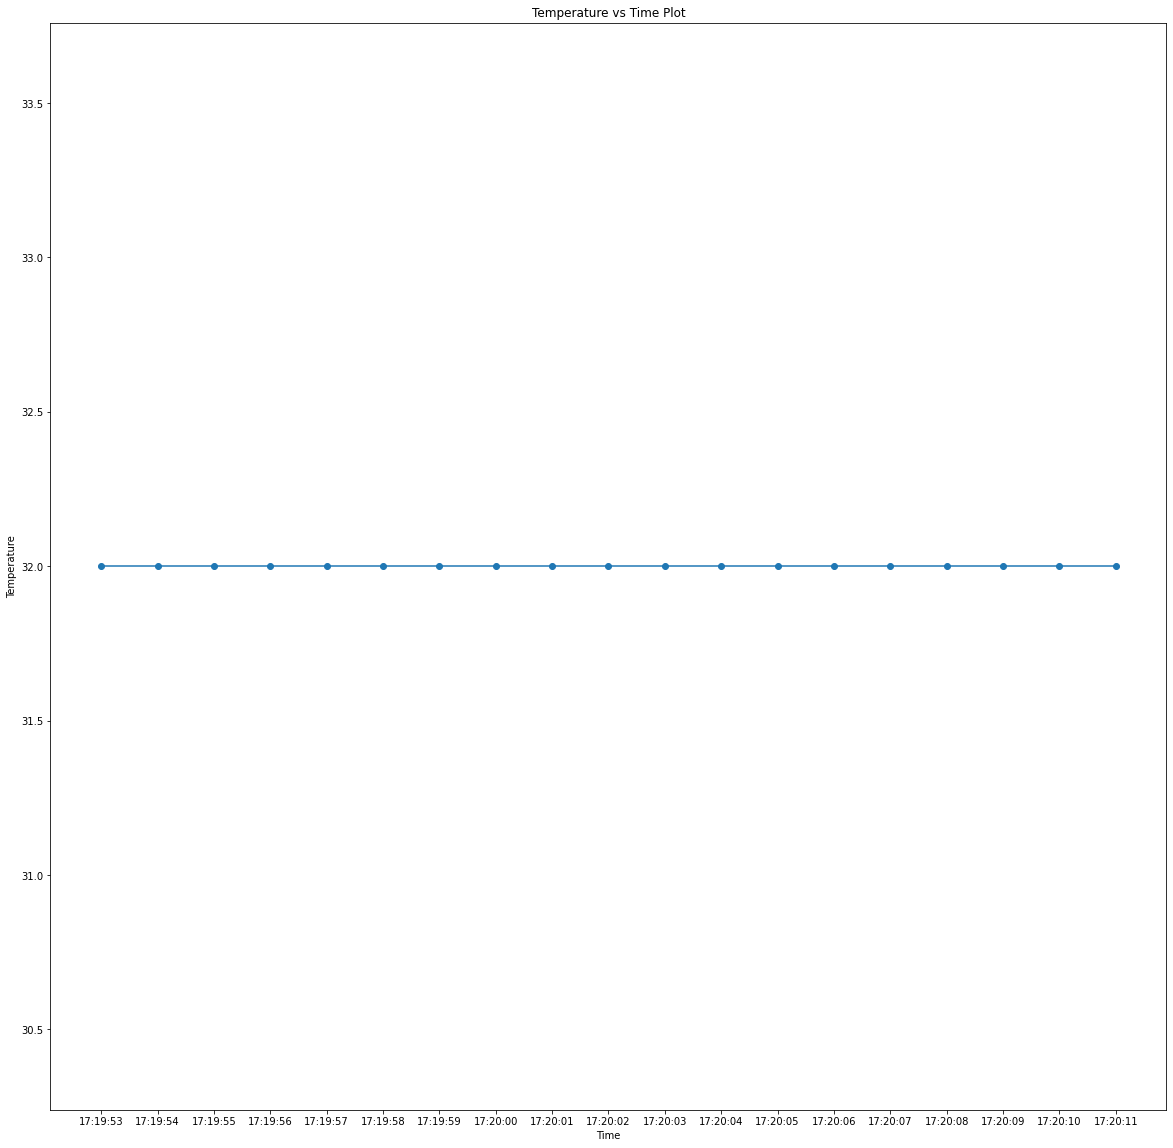

In [17]:
plt.plot(list(x_y1.keys()),y1)
plt.scatter(list(x_y1.keys()),y1)
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.title("Temperature vs Time Plot")
plt.rcParams['figure.figsize'] = [20, 20]

**4.Training the Model**

In [6]:

X = np.array(x1).reshape(-1, 1)
Y = np.array(y1).reshape(-1, 1)

#df_binary.dropna(inplace = True)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)

regr = LinearRegression()

regr.fit(X_train, y_train)
print(X_train, y_train)
print(X_test, y_test)
print(regr.score(X_test, y_test))

[[17.1959]
 [17.2002]
 [17.2005]
 [17.1955]
 [17.2003]
 [17.2001]
 [17.1957]
 [17.1953]
 [17.2011]
 [17.1956]
 [17.201 ]
 [17.2009]
 [17.2   ]
 [17.2007]] [[32.]
 [32.]
 [32.]
 [32.]
 [32.]
 [32.]
 [32.]
 [32.]
 [32.]
 [32.]
 [32.]
 [32.]
 [32.]
 [32.]]
[[17.2004]
 [17.2006]
 [17.1954]
 [17.2008]
 [17.1958]] [[32.]
 [32.]
 [32.]
 [32.]
 [32.]]
1.0


In [7]:
Time=184 #@param{type:"slider",min:1,max:500,step:1}

In [8]:
q=Time//60
r=Time%60
q,r

(3, 4)

In [9]:
X[-1]=X[-1]+(0.0001*r)
X[-1]=X[-1]+(0.01*q)
X[-1]

array([17.2315])

**5. Prediction**

In [10]:
regr.predict([X[-1]])

array([[32.]])

**6. Plotting humidity vs time**

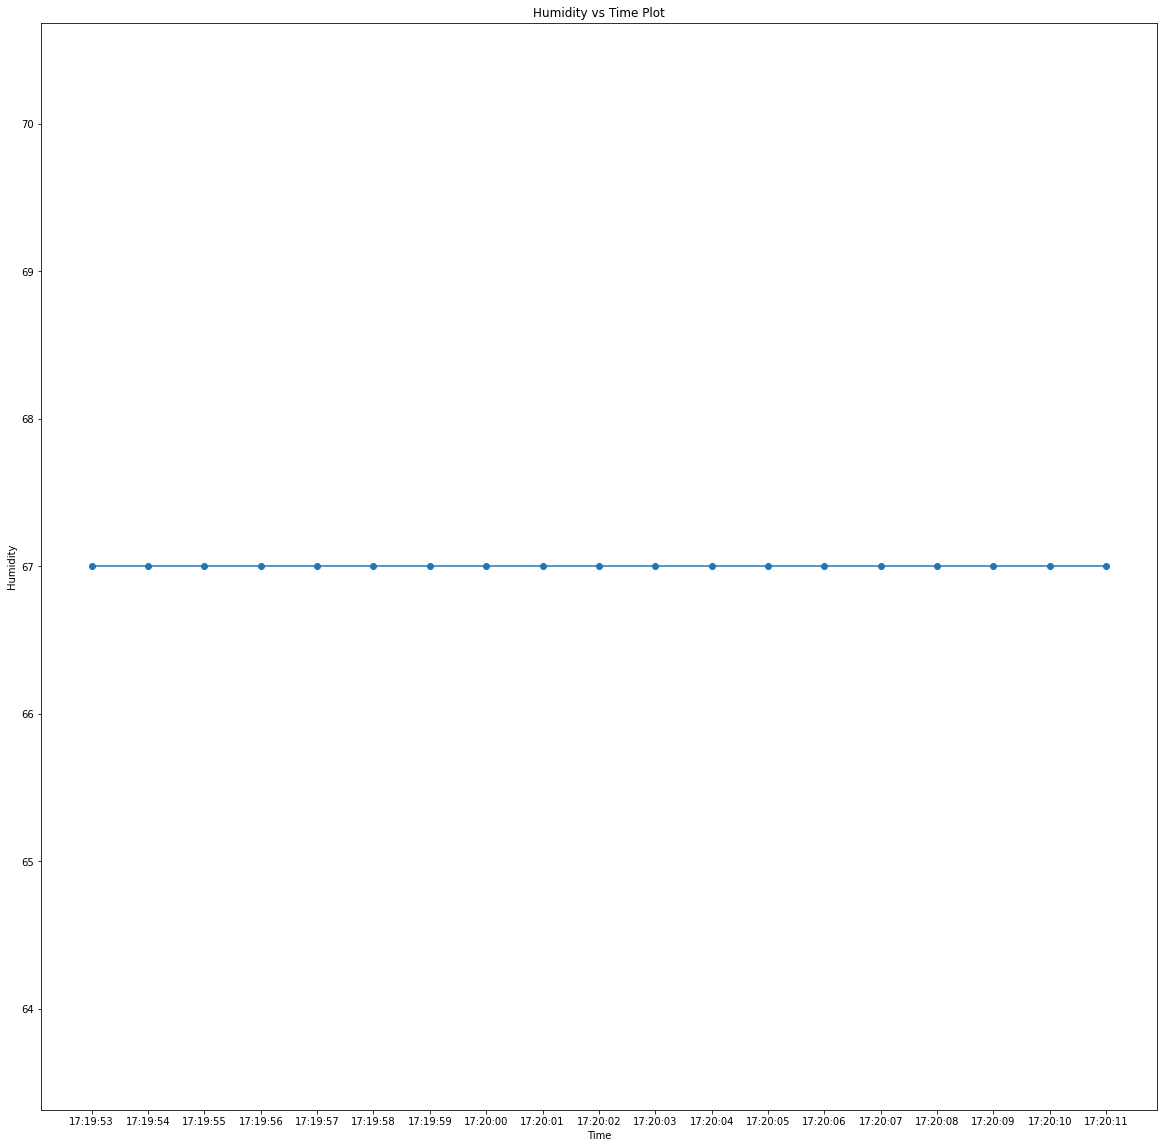

In [18]:
plt.plot(list(x_y2.keys()),y2)
plt.scatter(list(x_y2.keys()),y2)
plt.xlabel("Time")
plt.ylabel("Humidity")
plt.title("Humidity vs Time Plot")
plt.rcParams['figure.figsize'] = [2,2]

**7. Training the model**

In [12]:
X = np.array(x2).reshape(-1, 1)
Y = np.array(y2).reshape(-1, 1)

#df_binary.dropna(inplace = True)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)

regr = LinearRegression()

regr.fit(X_train, y_train)
print(X_train, y_train)
print(X_test, y_test)
print(regr.score(X_test, y_test))

[[17.2001]
 [17.1956]
 [17.1955]
 [17.1957]
 [17.2004]
 [17.1959]
 [17.2003]
 [17.2008]
 [17.2   ]
 [17.2009]
 [17.2005]
 [17.2007]
 [17.2011]
 [17.1958]] [[67.]
 [67.]
 [67.]
 [67.]
 [67.]
 [67.]
 [67.]
 [67.]
 [67.]
 [67.]
 [67.]
 [67.]
 [67.]
 [67.]]
[[17.1954]
 [17.201 ]
 [17.2002]
 [17.2006]
 [17.1953]] [[67.]
 [67.]
 [67.]
 [67.]
 [67.]]
1.0


In [13]:
Time=184 #@param{type:"slider",min:1,max:500,step:1}

In [14]:
q=Time//60
r=Time%60
q,r

(3, 4)

In [15]:
X[-1]=X[-1]+(0.0001*r)
X[-1]=X[-1]+(0.01*q)
X[-1]

array([17.2315])

**8. Prediction**

In [16]:
regr.predict([X[-1]])

array([[67.]])

 .

.

.

.

.

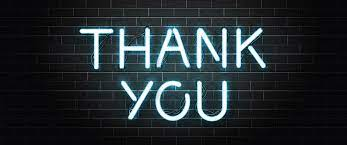